In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
# cp949로 csv 파일 인코딩하여 로드
# 종목코드를 기준으로 dataframe 합쳐주기
list = pd.read_csv('stock_list.csv', encoding='cp949')
linear_stock = pd.read_csv('stock_values_linear.csv', encoding='cp949')
linear_stock = pd.merge(list, linear_stock, on = '종목코드', how = 'left')
linear_stock

,종목명,종목코드,상장시장,7/3/23,7/4/23,7/5/23,7/6/23,7/7/23,7/10/23,7/11/23,...,12/11/23,12/12/23,12/13/23,12/14/23,12/15/23,12/18/23,12/19/23,12/20/23,12/21/23,12/22/23
0,삼성전자,5930,KOSPI,73000,73000,72000,71600,69900,69500,71500,...,73000,73500,72800,73100,73300,72900,73400,74800,75000,75900
1,SK하이닉스,660,KOSPI,117600,117900,116700,113800,111800,110300,113400,...,128900,131000,131200,136700,140000,140000,138200,140500,140500,140600
2,NAVER,35420,KOSPI,189300,188700,186500,195500,195000,193200,197400,...,217500,213500,213500,223000,226000,223000,222500,220500,216500,215000
3,카카오,35720,KOSPI,51000,49950,48850,50900,49850,49850,50700,...,52100,51800,50900,54300,54900,53900,53800,53700,52800,52800
4,삼성바이오로직스,207940,KOSPI,743000,746000,755000,749000,719000,708000,723000,...,703000,704000,701000,698000,703000,701000,704000,719000,712000,720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,유비케어,32620,KOSDAQ,5770,5720,5640,5640,5420,5350,5340,...,4890,4965,4945,5010,4880,4860,4850,4855,4810,4720
360,다날,64260,KOSDAQ,4090,4115,4035,3900,3760,3870,3975,...,4940,4750,4800,4975,4665,4590,4940,4905,4760,4690
361,제이시스메디칼,287410,KOSDAQ,9730,9920,10150,9860,9760,9800,9660,...,10650,10520,10500,10600,10250,10560,10700,10530,10580,10520
362,크리스에프앤씨,110790,KOSDAQ,18360,18250,18260,17830,17850,17860,18110,...,8250,8380,8230,8350,8490,8720,8680,8690,8690,8750


In [3]:
#모든 기업(364개)의 다음주 주식을 예측하기
price = linear_stock.iloc[:, 3:]
price = price.to_numpy()

name = linear_stock['종목명']
name = name.to_numpy()

model = LinearRegression()
for i in range(0, 364, 1):
    print(name[i],"다음주 주가를 예측합니다.")
    # 한 개의 기업의 25주간 가격 [2023.07.03 ~ 2023.12.22]
    company = price[i].reshape(-1,5)

    # x = 지난주 주식 가격 - 2023.07.03 ~ 2023.12.08 (23주)
    x = company[:-2, :]
    
    # y = 다음주 주식 가격 - 2023.07.10 ~ 2023.12.15 (23주)
    # y_0 = 다음주 월요일, y_1 = 다음주 화요일 ... y_4 = 다음주 금요일
    # y_0 = 2023.07.10 ~ 2023.12.15(23주)의 월요일 주식가격
    y = company[1:-1, : ]
    y_0 = y [:, 0]
    y_1 = y [:, 1]
    y_2 = y [:, 2]
    y_3 = y [:, 3]
    y_4 = y [:, 4]
    one_week = [y_0, y_1, y_2, y_3, y_4]

    # 2023.12.11 ~ 2023.12.15의 주식을 이용해 
    # 다음주(2023.12.18 ~ 2023.12.22)의 주식 가격 예측
    predict_x = company[-2:-1,]
    label = company[-1]
    
    predict_sample = []
    # 선형회귀 모델을 사용하여 다음주 주가 예측
    for day in one_week:
        model.fit(x, day)
        predict_result = model.predict(predict_x)
        predict_sample.append(round(predict_result[0],0))
    print("Pedicted price : ", predict_sample)
    print("Real price : " , label, '\n')

삼성전자 다음주 주가를 예측합니다.
Pedicted price :  [73141.0, 72921.0, 72915.0, 72811.0, 72705.0]
Real price :  [72900 73400 74800 75000 75900] 

SK하이닉스 다음주 주가를 예측합니다.
Pedicted price :  [138855.0, 137949.0, 135314.0, 130691.0, 128338.0]
Real price :  [140000 138200 140500 140500 140600] 

NAVER 다음주 주가를 예측합니다.
Pedicted price :  [229981.0, 229440.0, 226322.0, 224635.0, 222310.0]
Real price :  [223000 222500 220500 216500 215000] 

카카오 다음주 주가를 예측합니다.
Pedicted price :  [55946.0, 57136.0, 56854.0, 57809.0, 56717.0]
Real price :  [53900 53800 53700 52800 52800] 

삼성바이오로직스 다음주 주가를 예측합니다.
Pedicted price :  [705197.0, 698913.0, 696961.0, 707651.0, 706354.0]
Real price :  [701000 704000 719000 712000 720000] 

삼성전자우 다음주 주가를 예측합니다.
Pedicted price :  [58739.0, 58979.0, 58635.0, 58580.0, 58488.0]
Real price :  [59000 58600 59700 59900 60100] 

LG화학 다음주 주가를 예측합니다.
Pedicted price :  [514062.0, 499444.0, 499018.0, 490162.0, 493627.0]
Real price :  [498000 502000 504000 495000 490000] 

삼성SDI 다음주 주가를 예측합니다.
Pedicted

In [4]:
# 가격 정보만 가져오기
# 364개 회사의 125일(25주)주식 가격이 담겨있음
sample = linear_stock.iloc[:, 3:]
sample = sample.to_numpy()
print(sample.shape)
sample

(364, 125)


array([[ 73000,  73000,  72000, ...,  74800,  75000,  75900],
       [117600, 117900, 116700, ..., 140500, 140500, 140600],
       [189300, 188700, 186500, ..., 220500, 216500, 215000],
       ...,
       [  9730,   9920,  10150, ...,  10530,  10580,  10520],
       [ 18360,  18250,  18260, ...,   8690,   8690,   8750],
       [ 30950,  30500,  30300, ...,  28200,  28650,  29800]], dtype=int64)

In [5]:
# 2023.07.03 ~ 2023.12.22 삼성전자의 주가 
sample_price = sample[0].reshape(-1,5)

print("2023.07.03 ~ 2023.12.22 삼성전자의 주가")
print(sample_price)

# x = 지난주 주식 가격 - 2023.07.03 ~ 2023.12.08 (23주)
sample_price_x = sample_price[:-2, :]

# y = 다음주 주식 가격 - 2023.07.10 ~ 2023.12.15 (23주)
# y_0 = 다음주 월요일, y_1 = 다음주 화요일 ... y_4 = 다음주 금요일
# y_0 = 2023.07.10 ~ 2023.12.15 (23주)월요일 주식가격
sample_price_y = sample_price[1:-1 , : ]
y_0 = sample_price_y [:, 0]
y_1 = sample_price_y [:, 1]
y_2 = sample_price_y [:, 2]
y_3 = sample_price_y [:, 3]
y_4 = sample_price_y [:, 4]
one_week = [y_0, y_1, y_2, y_3, y_4]
    
# 2023.12.11 ~ 2023.12.15의 주식을 이용해 
# 다음주(2023.12.18 ~ 2023.12.22)의 주식 가격 예측
x_for_predict = sample_price[-2:-1,]
label_for_sample = sample_price[-1]

print("===== Shape of the x and y (23 weeks) =====")
print(sample_price_x.shape, sample_price_y.shape)
print("===== x (23.07.03 - 23.12.08) =====")
print(sample_price_x)
print("===== y (23.07.10 - 23.12.15) =====")
print(sample_price_y )
print("===== data_for_predict (23.12.11 - 23.12.15) ======")
print(x_for_predict)
print("===== label (23.12.18 - 23.12.22) =====")
print(label_for_sample)

2023.07.03 ~ 2023.12.22 삼성전자의 주가
[[73000 73000 72000 71600 69900]
 [69500 71500 71900 71900 73400]
 [73300 72000 71700 71000 70300]
 [70400 70000 69800 71700 70600]
 [69800 71100 69900 68800 68300]
 [68500 67600 68900 68000 67500]
 [67300 67300 67000 66700 66300]
 [66600 66600 67100 68200 67100]
 [66800 66800 67100 66900 71000]
 [71200 70700 70000 70400 70300]
 [70800 70500 70900 71700 72000]
 [70200 69800 69600 68900 68800]
 [69400 68600 68400 68400 68400]
 [68400 68400 67500 66700 66000]
 [66000 66400 68200 68900 68000]
 [67300 69400 70500 69500 68800]
 [68400 68500 68000 66700 67300]
 [67300 66900 68600 69700 69600]
 [70900 70900 69900 70300 70500]
 [70400 70800 72200 72800 72500]
 [72700 72800 72800 72400 71700]
 [71300 72700 72700 72800 72000]
 [72600 71200 71700 71500 72600]
 [73000 73500 72800 73100 73300]
 [72900 73400 74800 75000 75900]]
===== Shape of the x and y (23 weeks) =====
(23, 5) (23, 5)
===== x (23.07.03 - 23.12.08) =====
[[73000 73000 72000 71600 69900]
 [69500 7150

In [6]:
model = LinearRegression()
predict_sample = []
#선형회귀 모델을 사용하여 다음주 주가 예측
# one_week = [y_0, y_1, y_2, y_3, y_4]
for day in one_week:
    model.fit(sample_price_x, day)
    predict_result = model.predict(x_for_predict)
    predict_sample.append(round(predict_result[0],0))
print("predicted price(2023.12.18 - 2023.12.22)")
print("predict :" ,predict_sample)
print("real_value :", label_for_sample)

predicted price(2023.12.18 - 2023.12.22)
predict : [73141.0, 72921.0, 72915.0, 72811.0, 72705.0]
real_value : [72900 73400 74800 75000 75900]


In [7]:
# 회귀선의 coefficient와 절편 값을 알아낼 수 있다.
print("coefficient:", model.coef_)
print('절편: %.3f' % model.intercept_)

coefficient: [ 0.27732844  0.22887034 -0.63325505  0.40698817  0.4443473 ]
절편: 19417.202


predict : [73141.0, 72921.0, 72915.0, 72811.0, 72705.0]
real_value : [72900 73400 74800 75000 75900]


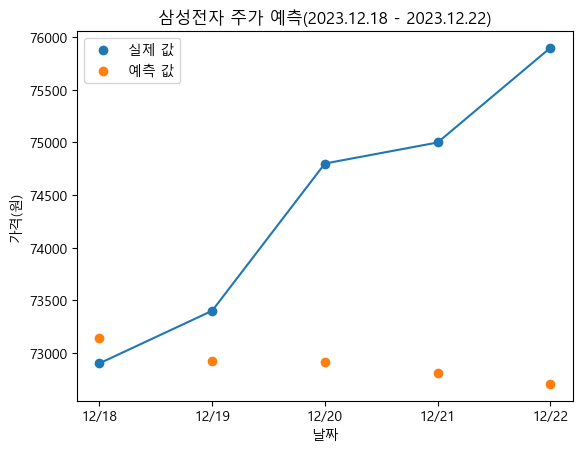

In [8]:
#matplotlib에서 한글이 깨지는 현상 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


print("predict :" ,predict_sample)
print("real_value :", label_for_sample)

plt.title("삼성전자 주가 예측(2023.12.18 - 2023.12.22)")
plt.xlabel("날짜")
plt.ylabel("가격(원)")
#예측한 기간
predict_day = ["12/18","12/19","12/20","12/21","12/22"]
plt.scatter(predict_day, label_for_sample, label = "실제 값")
plt.plot(predict_day, label_for_sample)
plt.scatter(predict_day, predict_sample, label = "예측 값")

plt.legend()
plt.show()

예측하고 싶은 종목을 입력하세요 :  카카오


predicted price(2023.12.18 - 2023.12.22)
predict : [55946.0, 57136.0, 56854.0, 57809.0, 56717.0]
real_value : [53900 53800 53700 52800 52800]


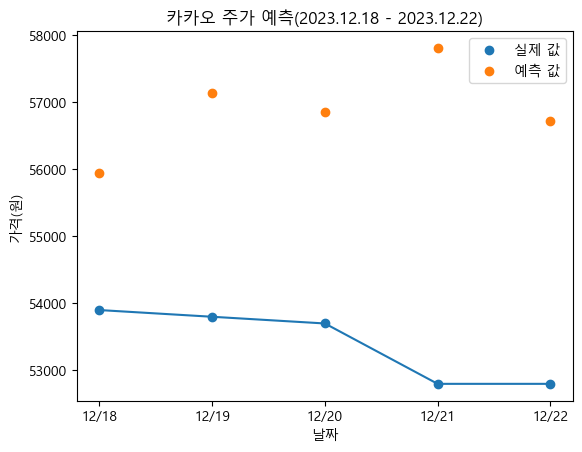

예측하고 싶은 종목을 입력하세요 :  SK하이닉스


predicted price(2023.12.18 - 2023.12.22)
predict : [138855.0, 137949.0, 135314.0, 130691.0, 128338.0]
real_value : [140000 138200 140500 140500 140600]


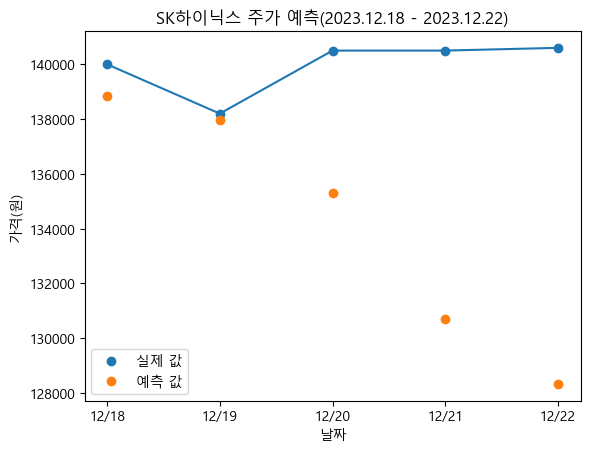

In [9]:
for i in range(0,2,1):
    company_name = input("예측하고 싶은 종목을 입력하세요 : ")
    sample = linear_stock[linear_stock['종목명']==company_name]
    sample = sample.iloc[:, 3:]
    sample = sample.to_numpy()
    
    sample_price = sample.reshape(-1,5)
    # x = 지난주 주식 가격 - 2023.07.03 ~ 2023.12.08 (23주)
    sample_x = sample_price[:-2, :]
    
    # y = 다음주 주식 가격 - 2023.07.10 ~ 2023.12.15 (23주)
    # y_0 = 다음주 월요일, y_1 = 다음주 화요일 ... y_4 = 다음주 금요일
    # y_0 = 2023.07.10 ~ 2023.12.22 (23주) 간의 월요일 주식가격
    sample_y = sample_price[1:-1 , : ]
    y_0 = sample_y [:, 0]
    y_1 = sample_y [:, 1]
    y_2 = sample_y [:, 2]
    y_3 = sample_y [:, 3]
    y_4 = sample_y [:, 4]
    one_week = [y_0, y_1, y_2, y_3, y_4]
    
    # 2023.12.18 - 2023.12.22의 주식을 이용해 다음주의 주식 가격 예측하기
    predict_x = sample_price[-2:-1,]
    my_label = sample_price[-1]
    
    model = LinearRegression()
    predict_sample = []
    #선형회귀 모델을 사용하여 다음주 주가 예측
    for day in one_week:
        model.fit(sample_x, day)
        predict_result = model.predict(predict_x)
        predict_sample.append(round(predict_result[0],0))
    print("predicted price(2023.12.18 - 2023.12.22)")
    print("predict :" ,predict_sample)
    print("real_value :",my_label)
    
    plt.title(company_name + " 주가 예측(2023.12.18 - 2023.12.22)")
    plt.xlabel("날짜")
    plt.ylabel("가격(원)")
    predict_day = ["12/18","12/19","12/20","12/21","12/22"]
    plt.plot(predict_day, my_label)
    plt.scatter(predict_day, my_label, label = "실제 값")
    
    plt.scatter(predict_day, predict_sample, label = "예측 값")
    plt.legend()
    plt.show()

In [10]:
# cp949로 csv 파일 인코딩하여 로드
# 종목코드를 기준으로 dataframe 합쳐주기
logistic_stock = pd.read_csv('stock_values_logistic.csv', encoding='cp949')
logistic_stock = pd.merge(list, logistic_stock, on = '종목코드', how = 'left')
logistic_stock

,종목명,종목코드,상장시장,7/3/23,7/4/23,7/5/23,7/6/23,7/7/23,7/10/23,7/11/23,...,12/11/23,12/12/23,12/13/23,12/14/23,12/15/23,12/18/23,12/19/23,12/20/23,12/21/23,12/22/23
0,삼성전자,5930,KOSPI,0,0,2,2,2,2,1,...,1,1,2,0,0,2,1,1,1,1
1,SK하이닉스,660,KOSPI,0,0,2,2,2,2,1,...,1,1,0,1,1,0,2,1,0,0
2,NAVER,35420,KOSPI,0,0,2,1,0,2,1,...,0,2,0,1,1,2,0,2,2,2
3,카카오,35720,KOSPI,0,2,2,1,2,0,1,...,1,2,2,1,1,2,0,0,2,0
4,삼성바이오로직스,207940,KOSPI,0,0,1,2,2,2,1,...,2,0,0,0,1,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,유비케어,32620,KOSDAQ,0,2,2,0,2,2,0,...,0,1,0,1,2,0,0,0,2,2
360,다날,64260,KOSDAQ,0,1,2,2,2,1,1,...,2,2,1,1,2,2,1,2,2,2
361,제이시스메디칼,287410,KOSDAQ,0,1,1,2,2,0,2,...,1,2,0,1,2,1,1,2,1,2
362,크리스에프앤씨,110790,KOSDAQ,0,2,0,2,0,0,1,...,2,1,2,1,1,1,2,0,0,1


In [11]:
trash_data = logistic_stock[logistic_stock['종목명'] == '오스템임플란트']
trash_data = trash_data.to_numpy()
trash_data[0,3:].reshape(-1,5)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=object)

In [12]:
#모든 기업(364개)의 다음주 주식을 예측하기
change = logistic_stock.iloc[:, 3:]
change = change.to_numpy()

name = linear_stock['종목명']

# parameter
# multi_Class = 'auto'를 통해 멀티 클래스 분류가 가능해짐
# C : 정규화의 강도를 결정 -> 값이 작을 수록 강한 정규화를 적용
lr = LogisticRegression(solver='liblinear', multi_class='auto',C = 100, random_state=1)

for i in range(0, 364, 1):
    print(i, ": ",name[i],"다음주 주가 변화를 예측합니다.")
    print("0 : 유지 / 1 : 올라가는 추세 / 2 : 내려가는 추세 (전날 가격기준)")
    # 한 개의 기업의 25주간 주가 변화유형 [2023.07.03 ~ 2023.12.22]
    sample_change = change[i].reshape(-1,5)

    # x = 지난주 주가 변화유형 - 2023.07.03 ~ 2023.12.08 (23주)
    x = sample_change[:-2, :]

    # y = 다음주 주가 변화 유형 - 2023.07.10 ~ 2023.12.15 (23주)
    # y_0 = 다음주 월요일, y_1 = 다음주 화요일 ... y_4 = 다음주 금요일
    # y_0 = 2023.07.10 ~ 2023.12.22 (23주)의 월요일 주가 변화유형
    y = sample_change[1:-1, : ]
    y_0 = y [:, 0] #월
    y_1 = y [:, 1] #화
    y_2 = y [:, 2] #수
    y_3 = y [:, 3] #목
    y_4 = y [:, 4] #금

    # 한 요일에 대해 label이 모두 같은 class인 경우 Logistic regression 불가
    # 위와 같은 데이터 예외처리
    '''
    This solver needs samples of at least 2 classes in the data
    but the data contains only one class: 0
    '''
    if(np.max(y_0) == 0 or np.max(y_1) == 0 or np.max(y_2) == 0 
       or np.max(y_3) == 0 or np.max(y_4) == 0): continue
        
    one_week = [y_0, y_1, y_2, y_3, y_4]

    # 2023.12.11 ~ 2023.12.15의 주가 변화유형을 이용해
    # 다음주(2023.12.18 ~ 2023.12.22)의 주식 변화유형 예측
    predict_x = sample_change[-2:-1,]
    label_logistic = sample_change[-1]
    
    predict_sample = []
    day = ["월요일 :", "화요일 :", "수요일 :", "목요일 :", "금요일 :"]
    #로지스틱 회귀 모델을 사용하여 다음주 주가 변화 예측
    for i in range(0, 5, 1):
        lr.fit(x, one_week[i])
        predict_result = lr.predict(predict_x)
        predict_sample.append(predict_result[0])
        prob = np.round(lr.predict_proba(predict_x),10)
        #print(prob)
        print(day[i], prob[0])
    print("====================")
    # 로지스틕 회귀 모델은 클래스에 대한 확률을 계산해주는 확률모델이다
    # 따라서 모든 클래스의 확률을 더했을때 1이 되어야한다.
    print("Sum of probabiility =" , np.sum(prob))
    print("====================")
    print("predicted price change(2023.12.18 - 2023.12.22)")
    print("predict :" ,predict_sample)
    print("real_value :", label_logistic)
    print("====================")

0 :  삼성전자 다음주 주가 변화를 예측합니다.
0 : 유지 / 1 : 올라가는 추세 / 2 : 내려가는 추세 (전날 가격기준)
월요일 : [0.56567568 0.42333638 0.01098794]
화요일 : [0.57154061 0.31853341 0.10992598]
수요일 : [0.02302059 0.77902111 0.1979583 ]
목요일 : [0.0516852 0.5041005 0.4442143]
금요일 : [8.99029189e-01 2.58008700e-04 1.00712803e-01]
Sum of probabiility = 1.0
predicted price change(2023.12.18 - 2023.12.22)
predict : [0, 0, 1, 1, 0]
real_value : [2 1 1 1 1]
1 :  SK하이닉스 다음주 주가 변화를 예측합니다.
0 : 유지 / 1 : 올라가는 추세 / 2 : 내려가는 추세 (전날 가격기준)
월요일 : [0.35443365 0.01815013 0.62741622]
화요일 : [0.44117636 0.54715132 0.01167232]
수요일 : [0.30949088 0.48325926 0.20724985]
목요일 : [0.10668127 0.66952129 0.22379744]
금요일 : [0.39773157 0.325342   0.27692643]
Sum of probabiility = 1.0
predicted price change(2023.12.18 - 2023.12.22)
predict : [2, 1, 1, 1, 0]
real_value : [0 2 1 0 0]
2 :  NAVER 다음주 주가 변화를 예측합니다.
0 : 유지 / 1 : 올라가는 추세 / 2 : 내려가는 추세 (전날 가격기준)
월요일 : [0.53922373 0.44067547 0.0201008 ]
화요일 : [0.62744288 0.15774783 0.21480929]
수요일 : [0.61131802 0.1325555

In [13]:
# logistic_regression
# 전날 기준 주가 변화유형만 가져오기
# 0: 유지, 1: 올라가는 추세, 2: 내려가는 추세 
# 364개 회사의 125일(25주)변화 정보가 담겨있음

logistic = logistic_stock.iloc[:, 3:]
logistic = logistic.to_numpy()
print(logistic.shape)
logistic

(364, 125)


array([[0, 0, 2, ..., 1, 1, 1],
       [0, 0, 2, ..., 1, 0, 0],
       [0, 0, 2, ..., 2, 2, 2],
       ...,
       [0, 1, 1, ..., 2, 1, 2],
       [0, 2, 0, ..., 0, 0, 1],
       [0, 2, 2, ..., 1, 1, 1]], dtype=int64)

In [14]:
# 이번주의 주가 변화유형을 통해 다음주의 주가 변화유형을 예측(3가지 클래스로 분류)

# 2023.07.03 ~ 2023.12.22 삼성전자의 주가 변화 유형
sample_logistic = logistic[0].reshape(-1,5)

print("2023.07.03 ~ 2023.12.22 삼성전자의 주가 변화 유형")
print(sample_logistic)

# x = 지난주의 가격 변화 - 2023.07.03 ~ 2023.12.18 (23주)
sample_x = sample_logistic[:-2, :]

# y = 다음주의 주식 가격변화 - 2023.07.03 ~ 2023.12.18(23주)
# y_0 = 다음주 월요일, y_1 = 다음주 화요일 ... y_4 = 다음주 금요일
# y_0 = 2023.07.03 ~ 2023.12.18(23주)의 월요일 주식 가격 변화
sample_y = sample_logistic[1:-1 , : ]
y_0 = sample_y [:, 0]
y_1 = sample_y [:, 1]
y_2 = sample_y [:, 2]
y_3 = sample_y [:, 3]
y_4 = sample_y [:, 4]
one_week = [y_0, y_1, y_2, y_3, y_4]

# 2023.12.11 ~ 2023.12.15의 데이터를 이용해 
# 다음주(2023.12.18 ~ 2023.12.22)의 주식 변화 유형 예측
predict_x = sample_logistic[-2:-1,]
sample_label = sample_logistic[-1]

print("===== Shape of the x and y (23 weeks) =====")
print(sample_x.shape, sample_y.shape)
print("===== x (23.07.03 - 23.12.08) =====")
print(sample_x)
print("===== y (23.07.10 - 23.12.15) =====")
print(sample_y)
print("===== data_for_predict (23.12.11 - 23.12.15) =======")
print(predict_x)
print("===== label (23.12.18 - 23.12.22) =====")
print(sample_label)

2023.07.03 ~ 2023.12.22 삼성전자의 주가 변화 유형
[[0 0 2 2 2]
 [2 1 1 0 1]
 [0 2 0 2 2]
 [0 2 0 1 2]
 [2 1 2 2 2]
 [0 2 1 2 2]
 [0 0 0 0 2]
 [0 0 1 1 2]
 [0 0 0 0 1]
 [0 2 2 1 0]
 [1 0 1 1 0]
 [2 2 0 2 0]
 [1 2 0 0 0]
 [0 0 2 2 2]
 [0 1 1 1 2]
 [2 1 1 2 2]
 [2 0 2 2 1]
 [0 2 1 1 0]
 [1 0 2 1 0]
 [0 1 1 1 0]
 [0 0 0 2 2]
 [2 1 0 0 2]
 [1 2 1 0 1]
 [1 1 2 0 0]
 [2 1 1 1 1]]
===== Shape of the x and y (23 weeks) =====
(23, 5) (23, 5)
===== x (23.07.03 - 23.12.08) =====
[[0 0 2 2 2]
 [2 1 1 0 1]
 [0 2 0 2 2]
 [0 2 0 1 2]
 [2 1 2 2 2]
 [0 2 1 2 2]
 [0 0 0 0 2]
 [0 0 1 1 2]
 [0 0 0 0 1]
 [0 2 2 1 0]
 [1 0 1 1 0]
 [2 2 0 2 0]
 [1 2 0 0 0]
 [0 0 2 2 2]
 [0 1 1 1 2]
 [2 1 1 2 2]
 [2 0 2 2 1]
 [0 2 1 1 0]
 [1 0 2 1 0]
 [0 1 1 1 0]
 [0 0 0 2 2]
 [2 1 0 0 2]
 [1 2 1 0 1]]
===== y (23.07.10 - 23.12.15) =====
[[2 1 1 0 1]
 [0 2 0 2 2]
 [0 2 0 1 2]
 [2 1 2 2 2]
 [0 2 1 2 2]
 [0 0 0 0 2]
 [0 0 1 1 2]
 [0 0 0 0 1]
 [0 2 2 1 0]
 [1 0 1 1 0]
 [2 2 0 2 0]
 [1 2 0 0 0]
 [0 0 2 2 2]
 [0 1 1 1 2]
 [2 1 1 2 2]
 [2 0 2 

In [15]:
predict_sample = []
day = ["월요일 :", "화요일 :", "수요일 :", "목요일 :", "금요일 :"]
#로지스틱 회귀 모델을 사용하여 다음주 주가 변화 예측
for i in range(0, 5, 1):
    lr.fit(sample_x, one_week[i])
    predict_result = lr.predict(predict_x)
    predict_sample.append(predict_result[0])
    probability = np.round(lr.predict_proba(predict_x),10)
    print(day[i], probability[0])
print("====================")
# 로지스틕 회귀 모델은 클래스에 대한 확률을 계산해주는 확률모델이다
# 따라서 모든 클래스의 확률을 더했을때 1이 되어야한다.
print("Sum of probabiility =" , np.sum(probability))
print("====================")
print("predicted price change(2023.12.18 - 2023.12.22)")
print("predict :" ,predict_sample)
print("real_value :", sample_label)

월요일 : [0.56567568 0.42333638 0.01098794]
화요일 : [0.57154061 0.31853341 0.10992598]
수요일 : [0.02302059 0.77902111 0.1979583 ]
목요일 : [0.0516852 0.5041005 0.4442143]
금요일 : [8.99029189e-01 2.58008700e-04 1.00712803e-01]
Sum of probabiility = 1.0
predicted price change(2023.12.18 - 2023.12.22)
predict : [0, 0, 1, 1, 0]
real_value : [2 1 1 1 1]


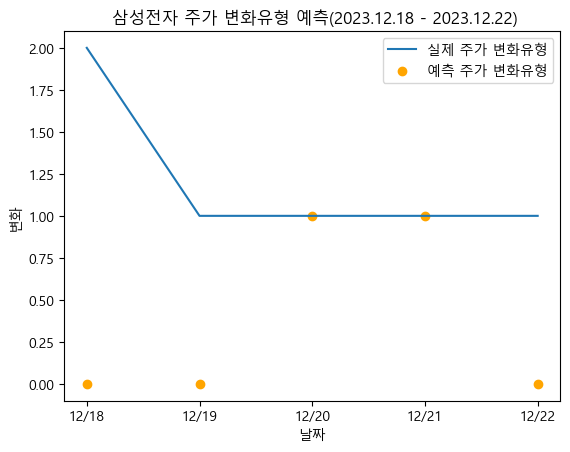

In [16]:
plt.title(" 삼성전자 주가 변화유형 예측(2023.12.18 - 2023.12.22)")
plt.xlabel("날짜")
plt.ylabel("변화")
predict_day = ["12/18","12/19","12/20","12/21","12/22"]
plt.plot(predict_day, sample_label, label = '실제 주가 변화유형')
plt.scatter(predict_day, predict_sample, label = "예측 주가 변화유형", color = 'orange')
plt.legend()
plt.show()

예측하고 싶은 종목을 입력하세요 :  카카오


predicted change(2023.12.18 - 2023.12.22)
predict : [2, 2, 2, 0, 0]
real_value : [2 0 0 2 0]


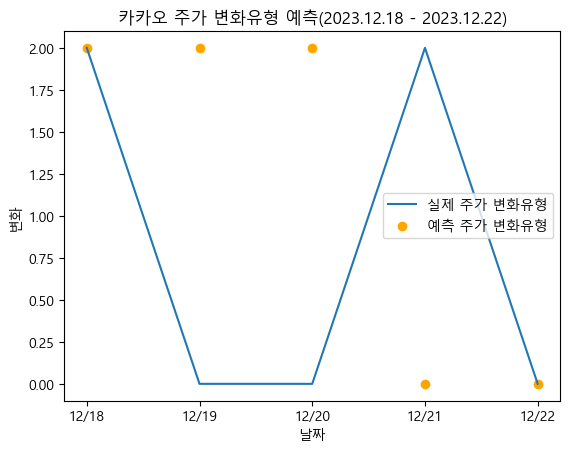

예측하고 싶은 종목을 입력하세요 :  SK하이닉스


predicted change(2023.12.18 - 2023.12.22)
predict : [2, 1, 1, 1, 0]
real_value : [0 2 1 0 0]


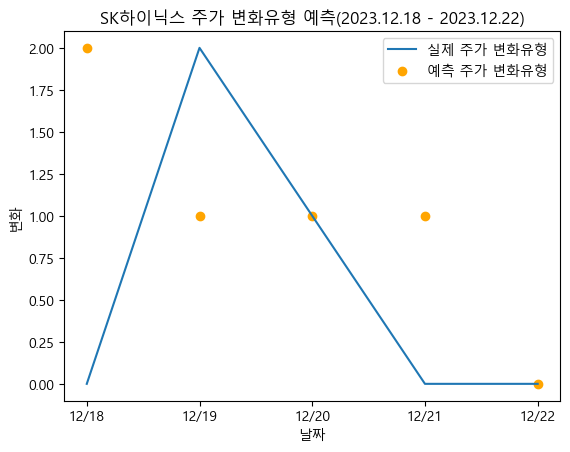

In [17]:
for i in range(0,2,1):
    company_name = input("예측하고 싶은 종목을 입력하세요 : ")
    sample = logistic_stock[logistic_stock['종목명']==company_name]
    sample = sample.iloc[:, 3:]
    sample = sample.to_numpy()
    
    sample_logi = sample.reshape(-1,5)
    # x = 지난주 주가 변화유형 - 2023.07.03 ~ 2023.12.08 (23주)
    x = sample_logi[:-2, :]
    
    # y = 다음주 주가 변화 유형 - 2023.07.10 ~ 2023.12.15 (23주)
    # y_0 = 다음주 월요일, y_1 = 다음주 화요일 ... y_4 = 다음주 금요일
    # y_0 = 2023.07.10 ~ 2023.12.22 (23주)의 월요일 주가 변화유형
    y = sample_logi[1:-1 , : ]
    y_0 = y [:, 0]
    y_1 = y [:, 1]
    y_2 = y [:, 2]
    y_3 = y [:, 3]
    y_4 = y [:, 4]

    # 한 요일에 대해 label이 모두 같은 class인 경우 Logistic regression 불가
    # 위와 같은 데이터 예외처리
    '''
    This solver needs samples of at least 2 classes in the data
    but the data contains only one class: 0
    '''
    if(np.max(y_0) == 0 or np.max(y_1) == 0 or np.max(y_2) == 0 
       or np.max(y_3) == 0 or np.max(y_4) == 0): continue
        
    one_week = [y_0, y_1, y_2, y_3, y_4]

    # 2023.12.11 ~ 2023.12.15의 주가 변화유형을 이용해
    # 다음주(2023.12.18 ~ 2023.12.22)의 주식 변화유형 예측
    predict_vx = sample_logi[-2:-1,]
    label_logi = sample_logi[-1]
    
    lr = LogisticRegression(solver='liblinear', multi_class='auto',C = 100, random_state=1)
    prediction_logi = []
    #선형회귀 모델을 사용하여 다음주 주가 예측
    for day in one_week:
        lr.fit(x, day)
        predict_result = lr.predict(predict_vx)
        prediction_logi.append(predict_result[0])
    print("predicted change(2023.12.18 - 2023.12.22)")
    print("predict :" ,prediction_logi)
    print("real_value :", label_logi)
    
    plt.title(company_name + " 주가 변화유형 예측(2023.12.18 - 2023.12.22)")
    plt.xlabel("날짜")
    plt.ylabel("변화")
    predict_day = ["12/18","12/19","12/20","12/21","12/22"]
    plt.plot(predict_day, label_logi, label = '실제 주가 변화유형')
    plt.scatter(predict_day, prediction_logi, label = "예측 주가 변화유형", color = 'orange')
    plt.legend()
    plt.show()